### k-means clustering

In [285]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [286]:
import scipy as sc
import scipy.stats as stats
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd

In [287]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [288]:
rv0 = stats.multivariate_normal(mean=[3, 3], cov=[[.3, .3],[.3,.4]])
rv1 = stats.multivariate_normal(mean=[1.5, 1], cov=[[.5, -.5],[-.5,.7]])
rv2 = stats.multivariate_normal(mean=[0, 1.2], cov=[[.15, .1],[.1,.3]])
rv3 = stats.multivariate_normal(mean=[3.2, 1], cov=[[.2, 0],[0,.1]])

z0 = rv0.rvs(size=300)
z1 = rv1.rvs(size=300)
z2 = rv2.rvs(size=300)
z3 = rv3.rvs(size=300)

z=np.concatenate((z0, z1, z2, z3), axis=0)

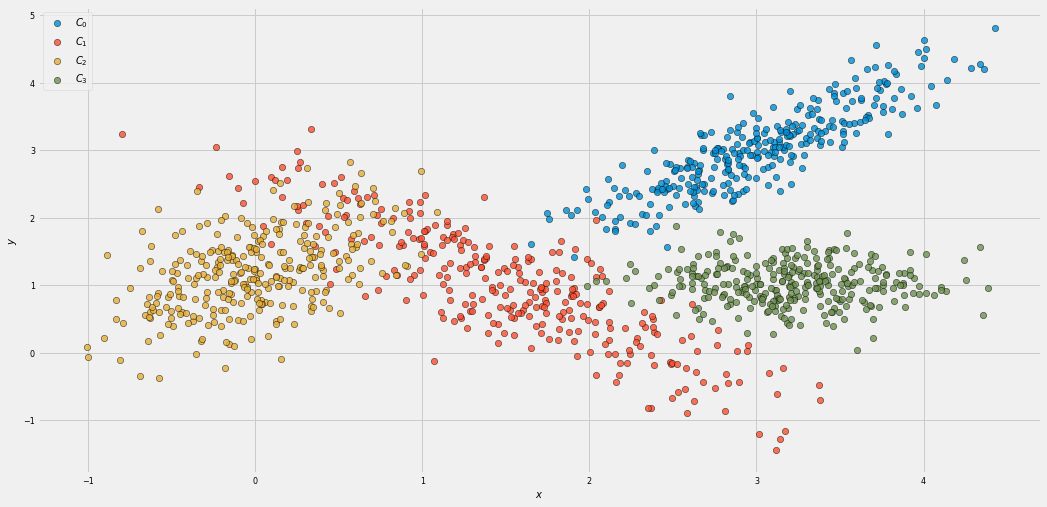

In [289]:
fig, ax = plt.subplots()
ax.scatter(z0[:,0], z0[:,1], s=40, color='C0', alpha =.8, edgecolors='k', label=r'$C_0$')
ax.scatter(z1[:,0], z1[:,1], s=40, color='C1', alpha =.8, edgecolors='k', label=r'$C_1$')
ax.scatter(z2[:,0], z2[:,1], s=40, color='C2', alpha =.8, edgecolors='k', label=r'$C_2$')
ax.scatter(z3[:,0], z3[:,1], s=40, color='C3', alpha =.8, edgecolors='k', label=r'$C_3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

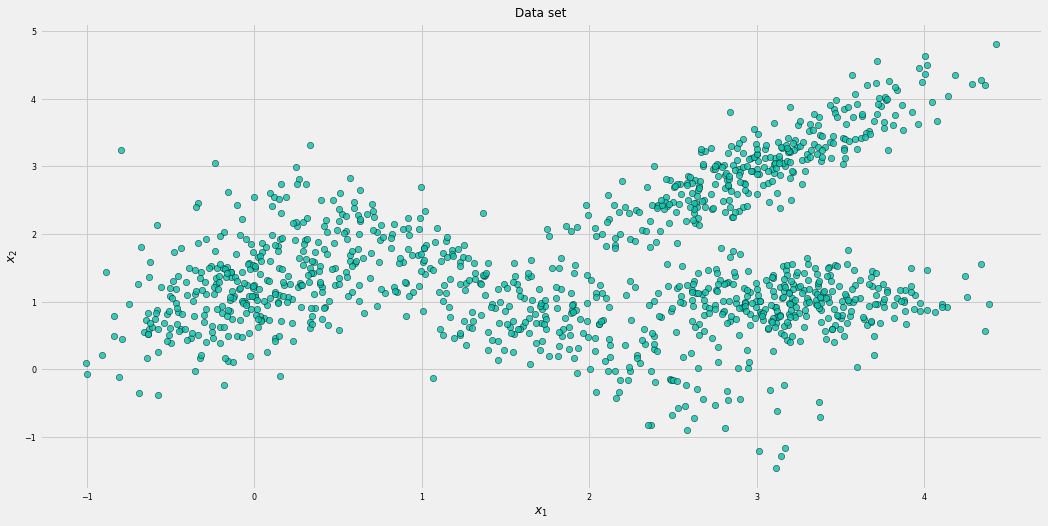

In [290]:
cc='xkcd:turquoise'
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(z[:,0], z[:,1], s=40, color=cc, edgecolors='k', alpha=.8)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [291]:
# Number of clusters
nc = 3
# X coordinates of random centroids
C_x = np.random.sample(nc)*(np.max(z[:,0])-np.min(z[:,0]))*.7+np.min(z[:,0])*.7
# Y coordinates of random centroids
C_y = np.random.sample(nc)*(np.max(z[:,1])-np.min(z[:,1]))*.7+np.min(z[:,0])*.7
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

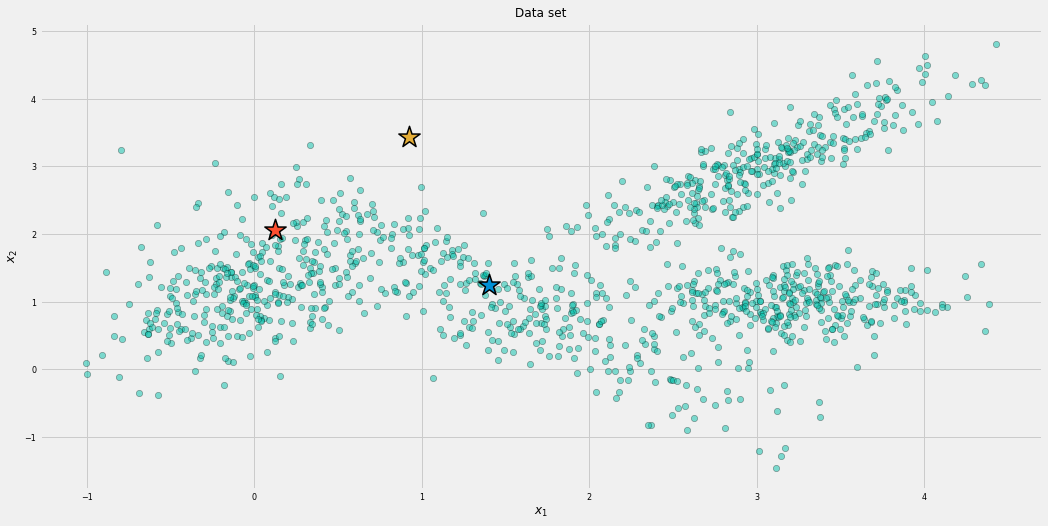

In [292]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.scatter(z[:,0], z[:,1], s=40, color=cc, edgecolors='k', alpha=.5)
for i in range(nc):
    plt.scatter(C_x[i], C_y[i], marker='*', s=500, c=colors[i], edgecolors='k', linewidth=1.5)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [293]:
C_list = []
errors = []
clusterings = []
clusters = np.zeros(z.shape[0])

In [294]:
import copy
for l in range(15):
    # Storing the old centroid values
    C_list.append(copy.copy(C))
    # Assigning each value to its closest cluster
    for i in range(z.shape[0]):
        distances = [euclidean(z[i,:], C[j,:]) for j in range(nc)]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    clusterings.append(copy.copy(clusters))
    error = np.linalg.norm([euclidean(C[i,:], C_list[-1][i,:]) for i in range(nc)])
    errors.append(error)

    C = np.zeros([nc,2])
    # Finding the new centroids by taking the average value
    for i in range(nc):
        points = [z[j,:] for j in range(z.shape[0]) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    #C_list.append(C)
    #clusterings.append(clusters)

[[1.4021529  1.2478898 ]
 [0.12384748 2.062391  ]
 [0.925749   3.4401205 ]]
[[2.43270111 1.07285182]
 [0.0073923  1.38832291]
 [3.18030324 3.32851859]]
[[2.66667072 0.91183883]
 [0.16875452 1.35300845]
 [3.11856526 3.14991239]]
[[2.75630068 0.86452637]
 [0.24447709 1.33374313]
 [3.08022113 3.10462047]]
[[2.78187875 0.85807725]
 [0.26931039 1.32821235]
 [3.07672187 3.10130743]]
[[2.78701319 0.85606392]
 [0.27510362 1.32827146]
 [3.07672187 3.10130743]]
[[2.79174926 0.84826698]
 [0.27510362 1.32827146]
 [3.06558938 3.09057223]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951 0.84061651]
 [0.27510362 1.32827146]
 [3.05710508 3.07965465]]
[[2.79509951

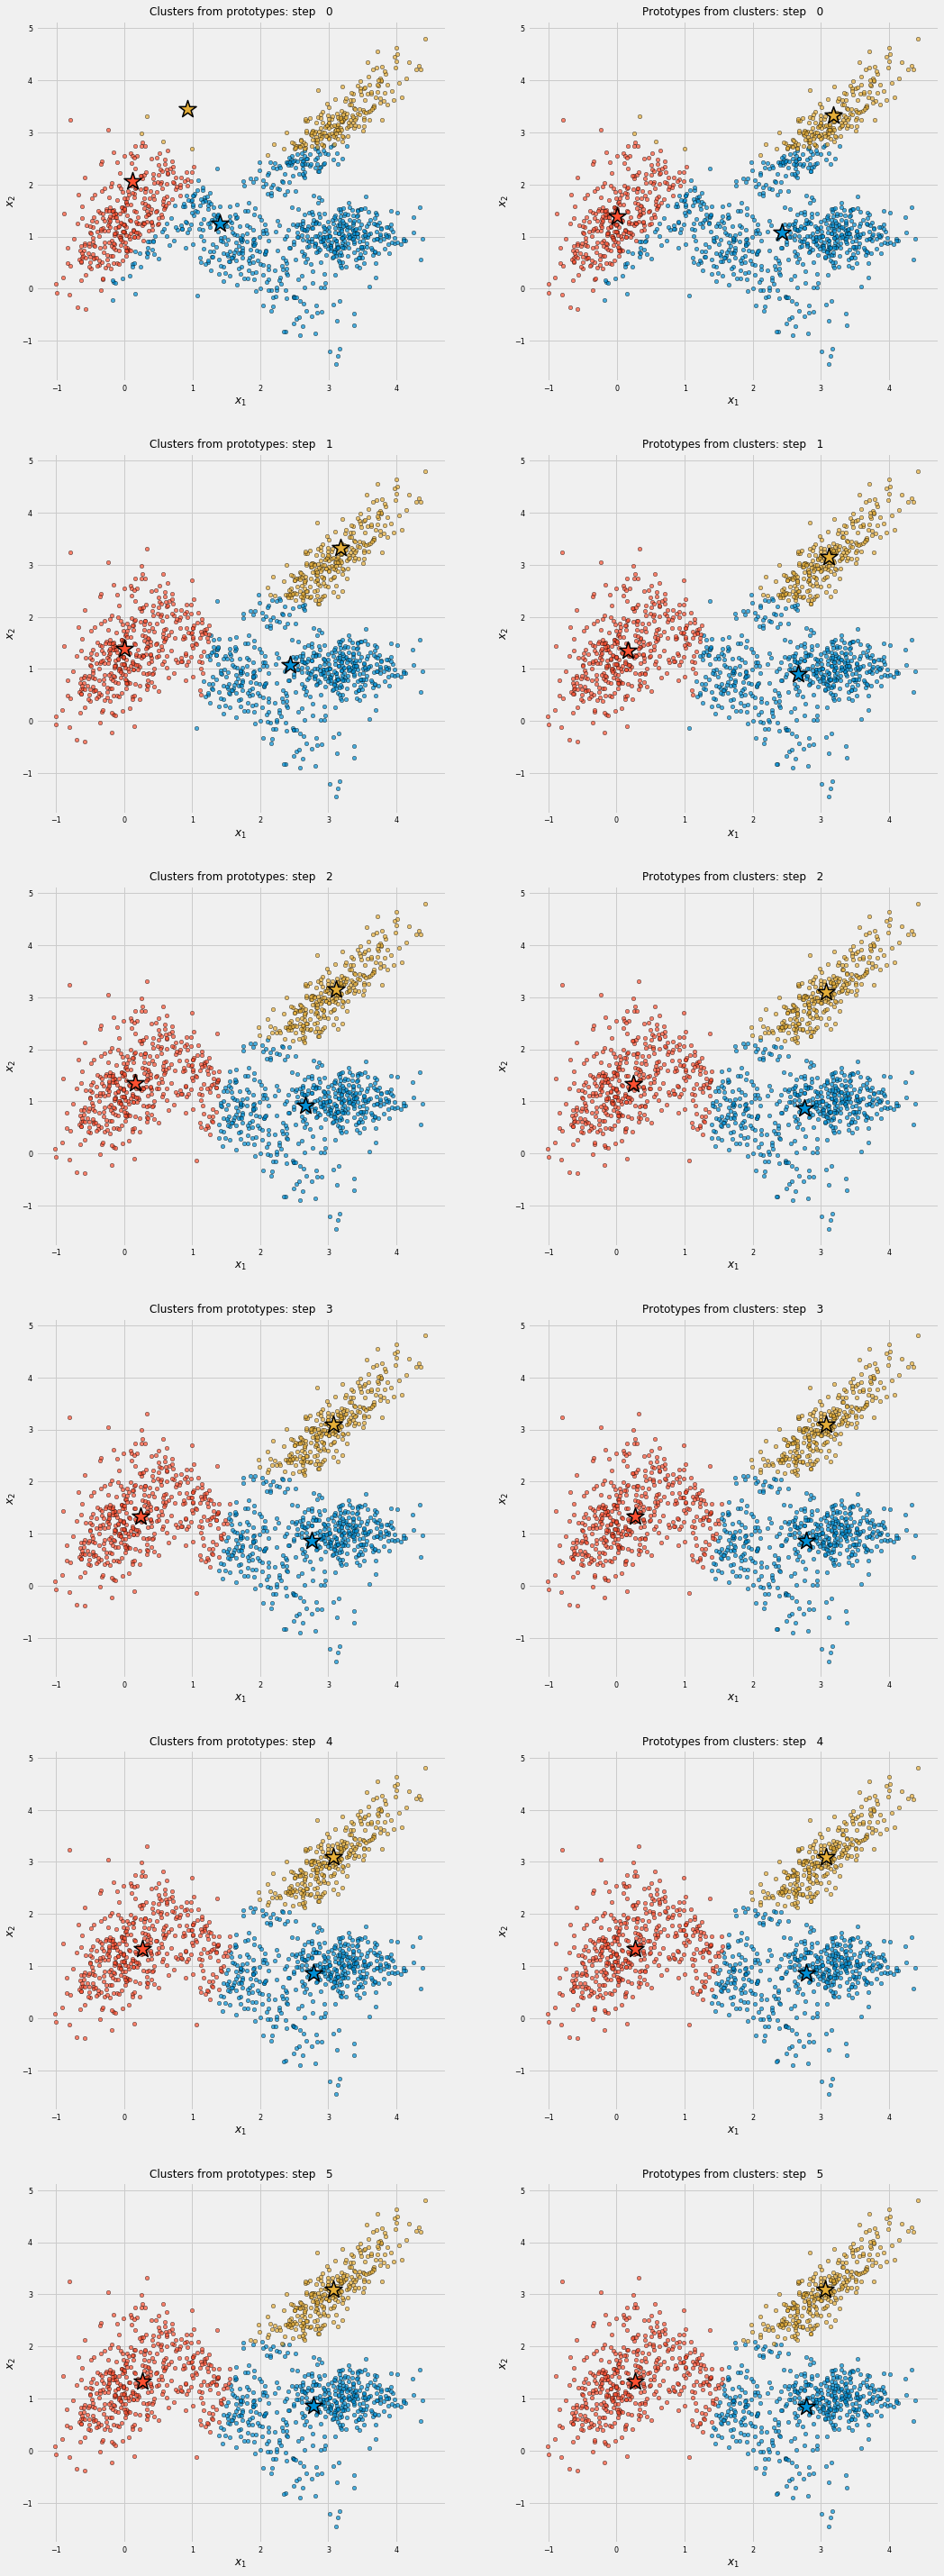

In [295]:
l,u=0,5
fig = plt.figure(figsize=(16,8*(u-l+1)))
ax = fig.gca()
for k in range(l,u+1):
    clusters=clusterings[k]
    plt.subplot(u-l+1,2,2*k-l+1)
    C=C_list[k]
    for cl in range(nc):
        z1 = z[clusters==cl]
        plt.scatter(z1[:,0],z1[:,1], c=colors[cl], marker='o', s=20, edgecolors='k', alpha=.7)
    for i in range(nc):
        plt.scatter(C[i,0], C[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5)
    plt.ylabel('$x_2$', fontsize=12)
    plt.xlabel('$x_1$', fontsize=12)
    plt.title('Clusters from prototypes: step {0:3d}'.format(k), fontsize=12)
    plt.subplot(u-l+1,2,2*k-l+2)
    C=C_list[k+1]
    for cl in range(nc):
        z1 = z[clusters==cl]
        plt.scatter(z1[:,0],z1[:,1], c=colors[cl], marker='o', s=20, edgecolors='k', alpha=.7)
    for i in range(nc):
        plt.scatter(C[i,0], C[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5)
    plt.ylabel('$x_2$', fontsize=12)
    plt.xlabel('$x_1$', fontsize=12)
    plt.title('Prototypes from clusters: step {0:3d}'.format(k), fontsize=12)
plt.show()

In [296]:
print('Evoluzione coordinate dei prototipi')
for l in range(15):
    print(C_list[l][0], C_list[l][1], C_list[l][2])

Evoluzione coordinate dei prototipi
[1.4021529 1.2478898] [0.12384748 2.062391  ] [0.925749  3.4401205]
[2.43270111 1.07285182] [0.0073923  1.38832291] [3.18030324 3.32851859]
[2.66667072 0.91183883] [0.16875452 1.35300845] [3.11856526 3.14991239]
[2.75630068 0.86452637] [0.24447709 1.33374313] [3.08022113 3.10462047]
[2.78187875 0.85807725] [0.26931039 1.32821235] [3.07672187 3.10130743]
[2.78701319 0.85606392] [0.27510362 1.32827146] [3.07672187 3.10130743]
[2.79174926 0.84826698] [0.27510362 1.32827146] [3.06558938 3.09057223]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510362 1.32827146] [3.05710508 3.07965465]
[2.79509951 0.84061651] [0.27510

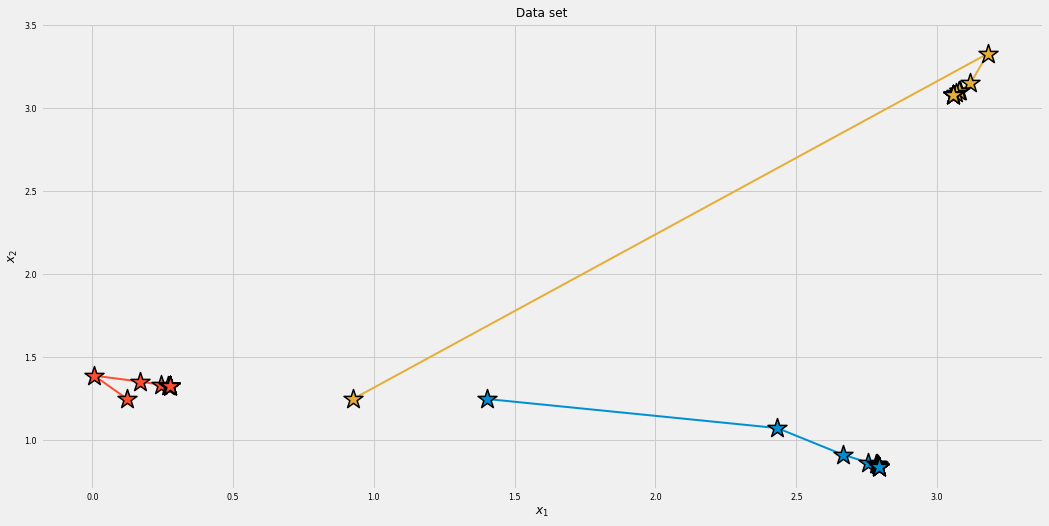

In [297]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for i in range(nc):
    px = C_list[0][i,0]
    py = C_list[0][0,1]
    plt.scatter(px, py, marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5, zorder=10)
    for C in C_list[1:]:
        cx = C[i,0]
        cy = C[i,1]
        plt.plot([px,cx],[py,cy], color=colors[i],zorder=5)
        plt.scatter(C[i,0], C[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5,zorder=10)
        px = cx
        py = cy
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [298]:
print('Cardinalità dei cluster')
for l in range(15):
    print(z[clusterings[l]==0].shape[0],z[clusterings[l]==1].shape[0],z[clusterings[l]==2].shape[0])

Cardinalità dei cluster
676 314 210
535 402 263
492 431 277
482 440 278
480 442 278
477 442 281
474 442 284
474 442 284
474 442 284
474 442 284
474 442 284
474 442 284
474 442 284
474 442 284
474 442 284


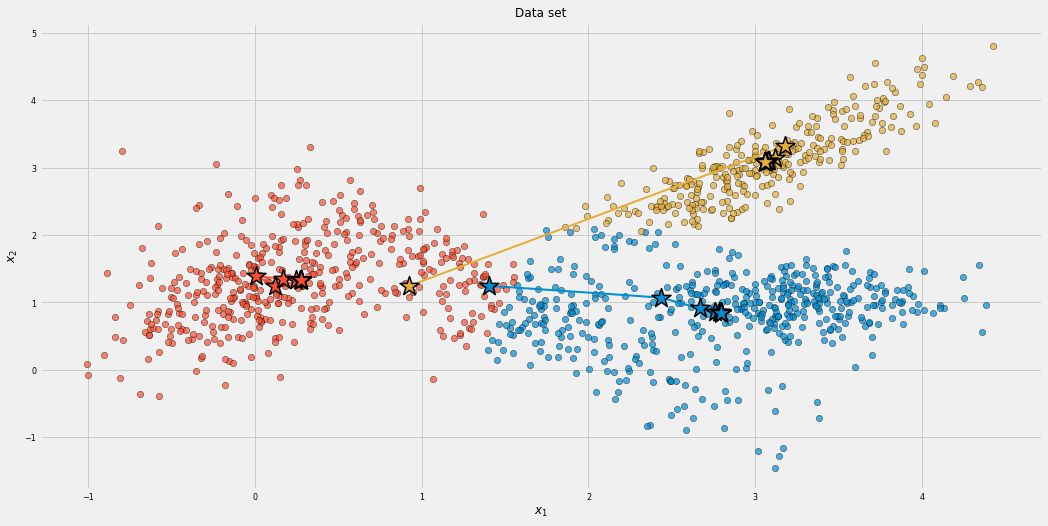

In [299]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for cl in range(nc):
    z1 = z[clusters==cl]
    plt.scatter(z1[:,0],z1[:,1], c=colors[cl], marker='o', s=40, edgecolors='k', alpha=.7)
for i in range(nc):
    px = C_list[0][i,0]
    py = C_list[0][0,1]
    plt.scatter(px, py, marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5, zorder=10)
    for C in C_list[1:]:
        cx = C[i,0]
        cy = C[i,1]
        plt.plot([px,cx],[py,cy], color=colors[i],zorder=5)
        plt.scatter(C[i,0], C[i,1], marker='*', s=400, c=colors[i], edgecolors='k', linewidth=1.5,zorder=10)
        px = cx
        py = cy
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Data set', fontsize=12)
plt.show()

In [300]:
print("Error: {0:3.5f}".format(error))

Error: 0.00000


In [301]:
print(errors)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [302]:
errors

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]